# スキャンスクリプトで取得したデータの処理

`sweep.sh` は半球面上の任意の位置から撮影して得られた動画を入力として 3D-ResNets のスコアを可視化するスクリプトである。ここではこのスクリプトを実行して得られたデータを使ってスコアをヒートマップにする方法を紹介する。

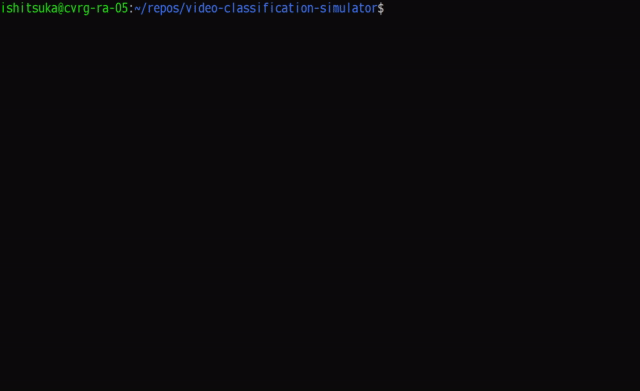

In [8]:
from IPython.display import Image, display
with open('../imgs/demo_sweep.gif', 'rb') as f:
    display(Image(f.read()))

半球の半径を一定（デフォルトで 10 m）にして、緯・経度を 1°間隔でスキャンしたデータを生成するには次のようにする：

    $ ./sweep.sh -m f00 -l walk --lon_step 1 --lat_step 1
    
オプションと引数の説明：

    -m, model   model_id       使用する人物モデル。男女 10 種類から選択する (f00|..|f04|m00|..|m04)
    -l, label   motion_label   モーションラベル。使用可能なラベルを確認する場合は次の引数を指定する `--show_labels`
    --lon_step  float          経度方向の移動量 (°)
    --lat_step  float          緯度方向の移動量 (°)
    
その他のオプションと引数の詳細はヘルプ（`-h, --help`）を参照。

スキャンして得られたデータはデフォルトで次のディレクトリに格納される：

```
../video-classification-simulators$ ./data_<TIMESTAMP>/results
../video-classification-simulators$ ls -tr ./data_<TIMESTAMP>/results
0_walk_10_0_90   1_walk_10_1_90   2_walk_10_2_90 ...
```
    
以下、この `results` ディレクトリをデータのルート（root）として扱う。  
このチュートリアルで使用するデータは次のリンク先からダウンロードできる（AIST internal）：
- <https://aistmail-my.sharepoint.com/:u:/g/personal/ishitsuka_hikaru_aist_go_jp/ERV0K8yeTNBKjQsGIsN0lrEBgF29NDllQX4kP6JevFyICg?e=pxkihL>
- <https://aistmail-my.sharepoint.com/:u:/g/personal/ishitsuka_hikaru_aist_go_jp/EXzVoC41evxPuAva7t7UWZQBFNxpSK5ReS5Fr2wAvk_O9g?e=cNyvhJ>

データ解析には `utils/sweep_data.py` モジュールをインポートする：

In [1]:
%matplotlib inline
import sys
sys.path.append('../utils/')
from sweep_data import SweepData

スキャン半径を固定して、緯度・経度を変化させて取得したデータは次のように指定する：

In [2]:
sd_r = SweepData(
    root='data/f00_walk_r=10_lon=0-360-1_lat=0-90-1/',
    fixed_axis='r',            # 動径方向（r）を固定したデータであることを明示
    lon_range=[-180, 180, 1],  # 経度の範囲と刻み幅（°）
    lat_range=[0, 90, 1]       # 緯度の範囲と刻み幅（°）
)

正解ラベルの `walk` のスコアを計算しヒートマップをプロットする：

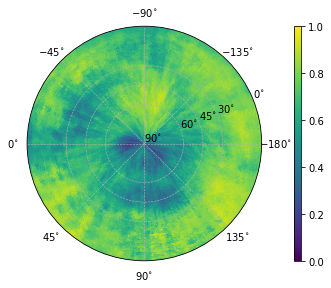

In [3]:
sd_r.heatmap('walk')
sd_r.plot(projection='polar')

投影方法（projection）は極座標 `polar` の他に `mollweide`, `hammer` 等をサポートしている。

同様に、緯度を固定して半径と経度を変化させて取得したデータのヒートマップをプロットするには次のようにする：

In [4]:
sd_lat = SweepData(
    root='data/f00_walk_r=1-50-1_lon=0-360-1_lat=45/',
    fixed_axis='lat',
    r_range=[1, 50, 1],
    lon_range=[-180, 180, 1]
)

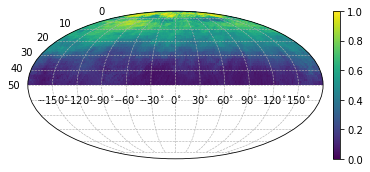

In [5]:
sd_lat.heatmap('walk')
sd_lat.plot(projection='mollweide')